In [122]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import decomposition
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_validate

# I. Apprentissage supervisé : Feature engineering et Classification

## Question 1

In [30]:
fichier_DF = pd.read_csv("credit_scoring.csv", sep=";")
fichier = fichier_DF.to_numpy(dtype=float)
nom_cols = fichier_DF.columns

In [31]:
fichier.shape

(4375, 14)

In [32]:
X = fichier[:,0:13]
Y = fichier[:,13]

In [33]:
print(X.shape, "\n", Y.shape)

(4375, 13) 
 (4375,)


(array([1216.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3159.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

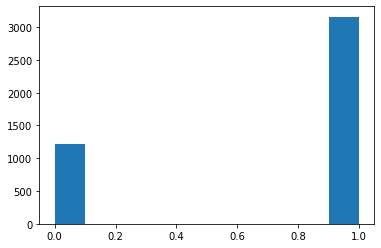

In [34]:
plt.hist(Y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

## Question 2

Arbre CART

In [36]:
classifier_CART = DecisionTreeClassifier(random_state=1)
classifier_CART.fit(X_train, y_train)
predict_CART = classifier_CART.predict(X_test)
m1 = confusion_matrix(y_test, predict_CART)
acc1 = (m1[0][0] + m1[1][1]) / len(y_test)
pre1 = m1[1][1] / (m1[1][1] + m1[0][1])

KNN

In [37]:
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train, y_train)
predict_KNN = classifier_KNN.predict(X_test)
m2 = confusion_matrix(y_test, predict_KNN)
acc2 = (m2[0][0] + m2[1][1]) / len(y_test)
pre2 = m2[1][1] / (m2[1][1] + m2[0][1])

Multilayer Perceptron

In [38]:
classifier_MP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
classifier_MP.fit(X_train, y_train)
predict_MP = classifier_MP.predict(X_test)
m3 = confusion_matrix(y_test, predict_MP)
acc3 = (m3[0][0] + m3[1][1]) / len(y_test)
pre3 = m3[1][1] / (m3[1][1] + m3[0][1])

In [39]:
print("CART \n", "Accuracy : ", acc1, "  Precision : ", pre1)
print("KNN \n", "Accuracy : ", acc2, "  Precision : ", pre2)
print("MP \n", "Accuracy : ", acc3, "  Precision : ", pre3)

CART 
 Accuracy :  0.7271480804387569   Precision :  0.8194174757281554
KNN 
 Accuracy :  0.7248628884826326   Precision :  0.7709713024282561
MP 
 Accuracy :  0.7394881170018281   Precision :  0.7540080160320641


On choisit d'étudier la précision et pas le rappel, car on veut être sûr que la personne à qui l'on accorde un crédit va nous rembourser.
Ici, les trois estimateurs donnent des accuracy assez similaires, cependant la précision diffère légèrement d'un estimateur à l'autre : celle de Cart est la meilleure, suivie de celle de KNN, et enfin celle de MP. Pour l'instant, Cart est le meilleur classifieur

## Question 3

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)
scaler.fit(X_test)
X_test_st = scaler.transform(X_test)

Cart avec données standardisées

In [41]:
classifier_CART = DecisionTreeClassifier(random_state=1)
classifier_CART.fit(X_train_st, y_train)
predict_CART = classifier_CART.predict(X_test_st)
m1 = confusion_matrix(y_test, predict_CART)
acc1 = (m1[0][0] + m1[1][1]) / len(y_test)
pre1 = m1[1][1] / (m1[1][1] + m1[0][1])

KNN avec données standardisées

In [42]:
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train_st, y_train)
predict_KNN = classifier_KNN.predict(X_test_st)
m2 = confusion_matrix(y_test, predict_KNN)
acc2 = (m2[0][0] + m2[1][1]) / len(y_test)
pre2 = m2[1][1] / (m2[1][1] + m2[0][1])

Multilayer Perception avec données standardisées

In [43]:
classifier_MP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
classifier_MP.fit(X_train_st, y_train)
predict_MP = classifier_MP.predict(X_test_st)
m3 = confusion_matrix(y_test, predict_MP)
acc3 = (m3[0][0] + m3[1][1]) / len(y_test)
pre3 = m3[1][1] / (m3[1][1] + m3[0][1])

In [44]:
print("CART \n", "Accuracy : ", acc1, "  Precision : ", pre1)
print("KNN \n", "Accuracy : ", acc2, "  Precision : ", pre2)
print("MP \n", "Accuracy : ", acc3, "  Precision : ", pre3)

CART 
 Accuracy :  0.7180073126142597   Precision :  0.8183015141540487
KNN 
 Accuracy :  0.7495429616087751   Precision :  0.8087008343265792
MP 
 Accuracy :  0.776508226691042   Precision :  0.8385899814471243


On remarque que pour les 3 estimateurs, l'accuracy et la précision ont augmenté. Avec les données standardisées, le meilleur estimateur devient MultiLayer Perception. Entre KNN et Cart, selon comment on valorise la précision par rapport à l'accuracy, on obtient que l'un ou l'autre est meilleur (Cart a une précision très légèrement supérieure à KNN, mais une accuracy lègèrement inférieure)

## Question 4

In [45]:
pca = decomposition.PCA()

pca.fit(X_train_st)
tmp = pca.transform(X_train_st)[:,0:3]
X_train_PCA = np.concatenate((X_train_st, tmp), axis=1)

pca.fit(X_test_st)
tmp = pca.transform(X_test_st)[:,0:3]
X_test_PCA = np.concatenate((X_test_st, tmp), axis=1)

Cart avec données standardisées + ajout des 3 variables de l'ACP

In [46]:
classifier_CART = DecisionTreeClassifier(random_state=1)
classifier_CART.fit(X_train_PCA, y_train)
predict_CART = classifier_CART.predict(X_test_PCA)
m1 = confusion_matrix(y_test, predict_CART)
acc1 = (m1[0][0] + m1[1][1]) / len(y_test)
pre1 = m1[1][1] / (m1[1][1] + m1[0][1])

KNN avec données standardisées + ajout des 3 variables de l'ACP

In [47]:
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train_PCA, y_train)
predict_KNN = classifier_KNN.predict(X_test_PCA)
m2 = confusion_matrix(y_test, predict_KNN)
acc2 = (m2[0][0] + m2[1][1]) / len(y_test)
pre2 = m2[1][1] / (m2[1][1] + m2[0][1])

Multilayer Perception avec données standardisées + ajout des 3 variables de l'ACP

In [48]:
classifier_MP = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
classifier_MP.fit(X_train_PCA, y_train)
predict_MP = classifier_MP.predict(X_test_PCA)
m3 = confusion_matrix(y_test, predict_MP)
acc3 = (m3[0][0] + m3[1][1]) / len(y_test)
pre3 = m3[1][1] / (m3[1][1] + m3[0][1])

In [49]:
print("CART \n", "Accuracy : ", acc1, "  Precision : ", pre1)
print("KNN \n", "Accuracy : ", acc2, "  Precision : ", pre2)
print("MP \n", "Accuracy : ", acc3, "  Precision : ", pre3)

CART 
 Accuracy :  0.7239488117001828   Precision :  0.8279785809906292
KNN 
 Accuracy :  0.7600548446069469   Precision :  0.8101933216168717
MP 
 Accuracy :  0.7755941499085923   Precision :  0.8278344331133773


Au niveau de l'accuracy, seule celle de KNN augmente de 3%. Au niveau de la précision, celles Cart et KNN augmentent de 1%, et celle de MP diminue de 1%

## Question 5

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


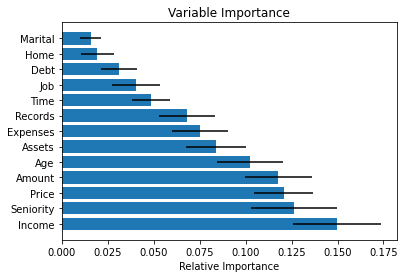

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_st, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = nom_cols
print(features[sorted_idx])
padding = np.arange(X_train_st.size/len(X_train_st)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

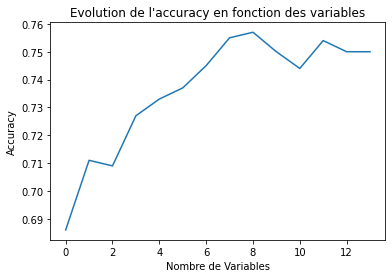

In [51]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_st.shape[1]+1)
for f in np.arange(0, X_train_st.shape[1]+1):
    X1_f = X_train_st[:,sorted_idx[:f+1]]
    X2_f = X_test_st[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

La meilleure accuracy est obtenue pour 8 variables. Cependant, la différence d'accuracy est 7 et 8 variables est relativement faible, donc on va choisir de garder seulement 7 variables et non 8, afin que nos algorithmes tournent plus vite. On va garder les 7 variables qui ont la meilleure importance relative obtenue sur le graphe ci-dessus.

In [52]:
X_train_s = X_train_st[:,0:7]
X_test_s = X_test_st[:,0:7]

# Question 6

Sélection paramètres Cart

In [65]:
parameters_cart = {'criterion':("gini", "entropy"), 'splitter':("best", "random")}
classifier_CART = GridSearchCV(DecisionTreeClassifier(random_state=1), parameters_cart)
classifier_CART.fit(X_train_s, y_train)
classifier_CART.get_params()
# argument max_depth à optimiser ? Car plus c'est profond, plus c'est efficace ?
# 'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8]}

{'cv': None,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 1,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(random_state=1),
 'n_jobs': None,
 'param_grid': {'criterion': ('gini', 'entropy'),
  'splitter': ('best', 'random')},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

Sélection paramètres KNN

In [66]:
parameters_knn = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9]}
classifier_CART = GridSearchCV(KNeighborsClassifier(), parameters_knn)
classifier_CART.fit(X_train_s, y_train)
classifier_CART.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

Sélection paramètres MP

In [67]:
parameters_mp = {'hidden_layer_sizes':[(40, 20), (30, 15), (60,30)], 'activation':('identity', 'logistic', 'tanh', 'relu')}
classifier_MP = GridSearchCV(MLPClassifier(), parameters_mp)
classifier_MP.fit(X_train_s, y_train)
classifier_MP.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(),
 'n_jobs': None,
 'param_grid': {'hidden_layer_sizes': [(40, 20), (30, 15), (60, 30)],
  'activation': ('identity', 'logistic', 'tanh', 'relu')},
 'pre_dispatch': '2*n_jobs',
 

## Question 7

Création d'une pipeline pour l'estimateur CART

In [84]:
pipe = Pipeline([('scaler', StandardScaler()), ('ACP', decomposition.PCA()), ('estimateur',DecisionTreeClassifier(random_state=100))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7125228519195612

Enregistrement dans un pickle du pipeline

In [85]:
with open('pickle_question_7', 'wb') as f1:
    pickle.dump(pipe, f1)

## Question 8

Classifieur NaiveBayesSimple (Gaussien)

In [70]:
classifier_naive_bayes = GaussianNB()
classifier_naive_bayes.fit(X_train_s, y_train)
classifier_naive_bayes.score(X_test_s, y_test)

0.7637111517367459

Classifieur Cart (avec paramètres optimaux obtenus à la question 6)

In [76]:
classifier_cart = DecisionTreeClassifier(random_state=1, criterion="gini", splitter="best", max_depth=5)
classifier_cart.fit(X_train_s, y_train)
classifier_cart.score(X_test_s, y_test)

0.7646252285191956

Classifieur Decision Stump

In [74]:
classifier_stump = DecisionTreeClassifier(random_state=1, max_depth=1)
classifier_stump.fit(X_train_s, y_train)
classifier_stump.score(X_test_s, y_test)

0.7239488117001828

Classifieur MLP

In [78]:
classifier_MP = MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1)
classifier_MP.fit(X_train_s, y_train)
classifier_MP.score(X_test_s, y_test)

0.7755941499085923

Classifieur KNN

In [82]:
classifier_KNN = KNeighborsClassifier(n_neighbors=5)
classifier_KNN.fit(X_train_s, y_train)
classifier_KNN.score(X_test_s, y_test)

0.7399451553930531

Classifieur Bagging (avec le classifieur Cart)

In [93]:
pipe = Pipeline([('scaler', StandardScaler()),('estimateur', DecisionTreeClassifier(random_state=1))])
bgclassifier = BaggingClassifier(base_estimator=pipe, n_estimators=50)
bgclassifier.fit(X_train[:,0:7], y_train)
bgclassifier.score(X_test[:,0:7], y_test)

0.7344606946983546

Classifieur AdaBoost (avec le classifieur par défaut : DecisionTree )

In [116]:
adaclassifier = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaclassifier.fit(X_train_st, y_train)
adaclassifier.score(X_test_st, y_test)

0.7861060329067642

Classifieur RandomForest

In [118]:
RFclassifier = RandomForestClassifier(n_estimators=50)
RFclassifier.fit(X_train_st, y_train)
RFclassifier.score(X_test_st, y_test)

0.7810786106032906

In [120]:
print(cross_validate(RandomForestClassifier(n_estimators=50), X_test_st, y_test, cv=10))

{'fit_time': array([0.19847894, 0.19195986, 0.19608951, 0.19322658, 0.19068193,
       0.19015813, 0.19226861, 0.18877649, 0.19356632, 0.1890986 ]), 'score_time': array([0.01182151, 0.01221514, 0.01120925, 0.0117209 , 0.01171303,
       0.01161075, 0.01220155, 0.01160049, 0.01187539, 0.01147079]), 'test_score': array([0.7716895 , 0.7716895 , 0.78538813, 0.76255708, 0.75799087,
       0.79452055, 0.77625571, 0.78995434, 0.81651376, 0.73853211])}


In [123]:
def compare_algo(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        clf = clfs[i] 
        cv_acc = cross_val_score(clf, X, Y, cv=kf) 
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))

clfs = { 'RF':RandomForestClassifier(n_estimators=50, random_state=1), 'Ada':AdaBoostClassifier(n_estimators=50, learning_rate=1), 'KNN':KNeighborsClassifier(n_neighbors=5), 'Bag':BaggingClassifier(base_estimator=pipe, n_estimators=50), 'MLP':MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1), 'Stump':DecisionTreeClassifier(random_state=1, max_depth=1), 'Cart':DecisionTreeClassifier(random_state=1, criterion="gini", splitter="best", max_depth=5), 'NBS':GaussianNB() }
compare_algo(clfs, scaler.transform(X), Y)

Accuracy for RF is: 0.782 +/- 0.015
Accuracy for Ada is: 0.788 +/- 0.016
Accuracy for KNN is: 0.763 +/- 0.018
Accuracy for Bag is: 0.776 +/- 0.014
Accuracy for MLP is: 0.788 +/- 0.019
Accuracy for Stump is: 0.722 +/- 0.018
Accuracy for Cart is: 0.774 +/- 0.012
Accuracy for NBS is: 0.768 +/- 0.019
